In [3]:
import math
import pandas as pd

def entropy(probabilities):
    return -sum(p * math.log2(p) if p > 0 else 0 for p in probabilities)


def information_gain(data, target, feature):
    
    total_entropy = entropy([(data[target] == label).mean() for label in data[target].unique()])
    
    
    weighted_entropy = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        subset_entropy = entropy([(subset[target] == label).mean() for label in subset[target].unique()])
        weight = len(subset) / len(data)
        weighted_entropy += weight * subset_entropy
    
    
    information_gain = total_entropy - weighted_entropy
    
    return information_gain


data = {
    'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}


target = 'buys_computer'


information_gains = {}
for feature in data.keys():
    if feature != target:
        information_gains[feature] = information_gain(pd.DataFrame(data), target, feature)

        
root_node = max(information_gains, key=information_gains.get)

print("Information Gains:")
for feature, ig in information_gains.items():
    print(f"{feature}: {ig}")

print(f"The root node should be: {root_node}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
The root node should be: age


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Define your dataset as a pandas DataFrame
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31..40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=["age", "income", "student","credit_rating"])

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Split the data into features and target
X = data.drop(columns=["buys_computer"])
y = data["buys_computer"]

# Fit the decision tree on the data
clf.fit(X, y)

# Calculate the depth of the constructed tree
tree_depth = clf.get_depth()
print(f"The depth of the constructed decision tree is: {tree_depth}")


The depth of the constructed decision tree is: 4


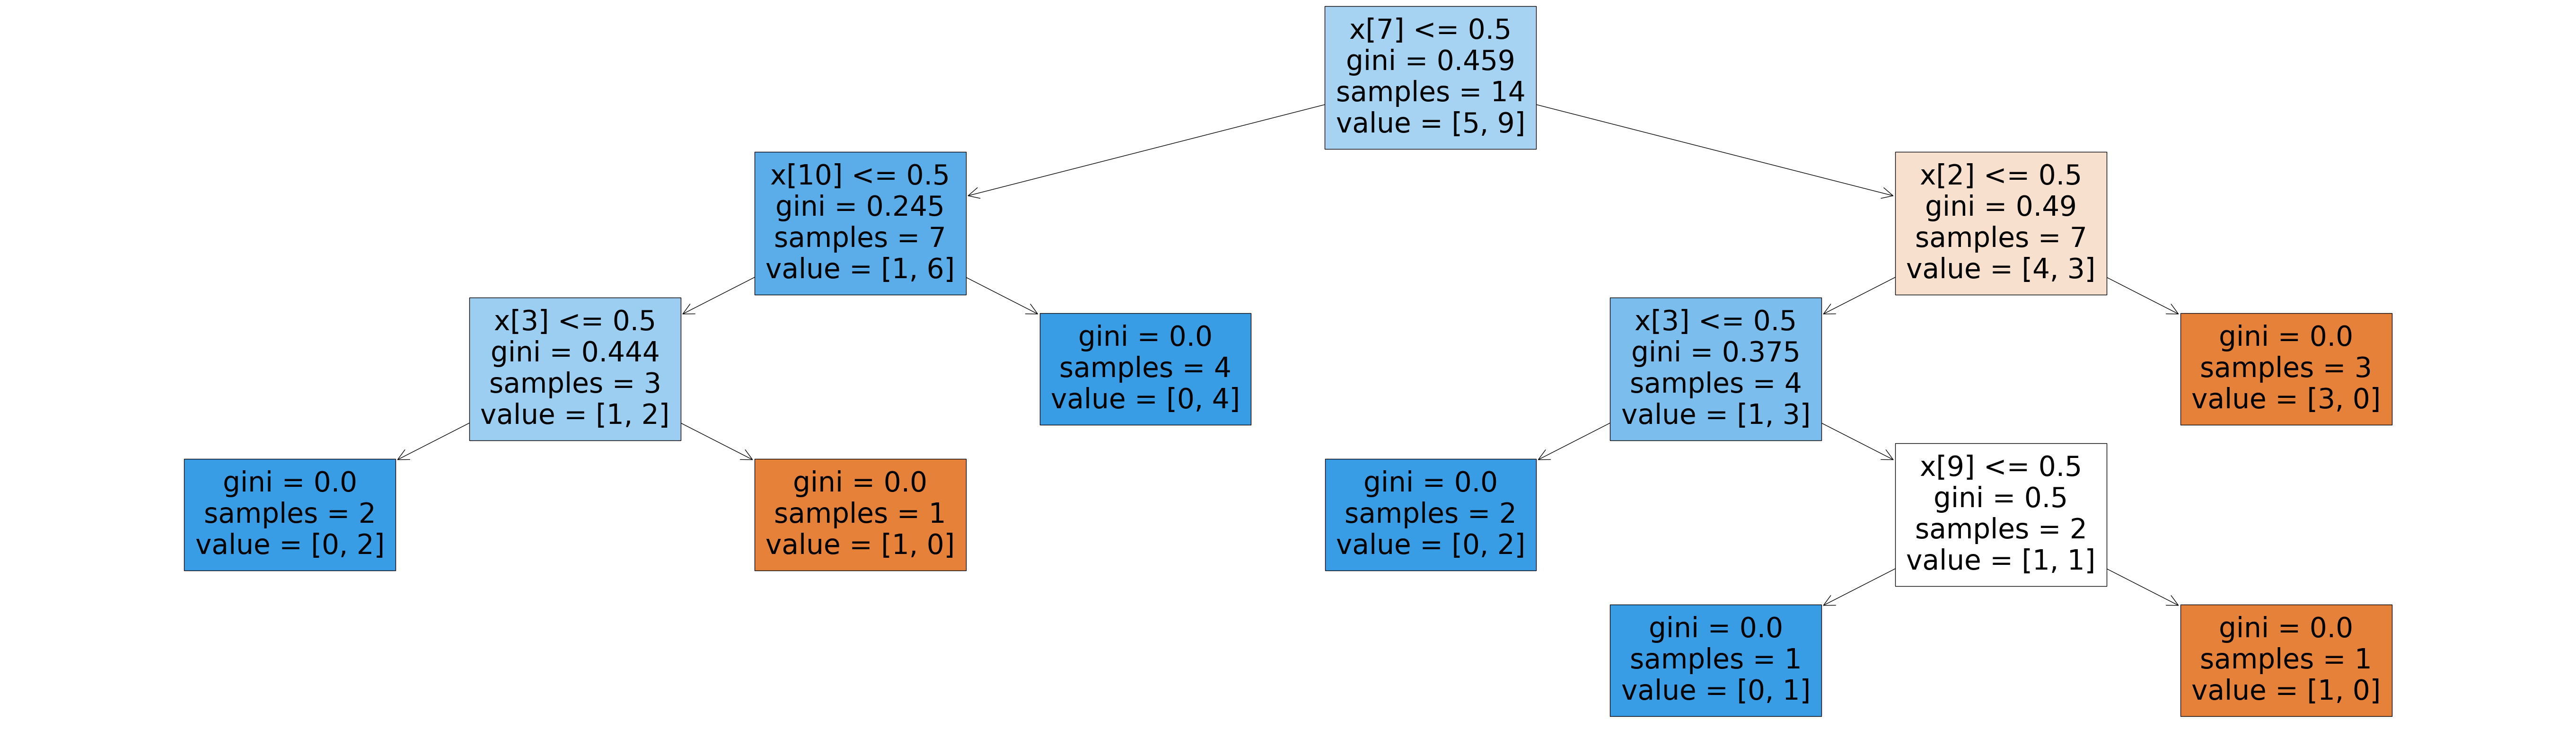

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Separate the features and target variable
X = data.drop(columns=['buys_computer'])
y = data['buys_computer']

# Create a list of feature names
feature_names = X.columns.tolist()

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the decision tree on the data
clf.fit(X, y)

# Create a figure and set the figure size
plt.figure(figsize=(70, 20))

# Plot the decision tree
plot_tree(clf, filled=True)

# Show the tree plot
plt.show()

Training Accuracy: 1.00
Test Accuracy: 1.00


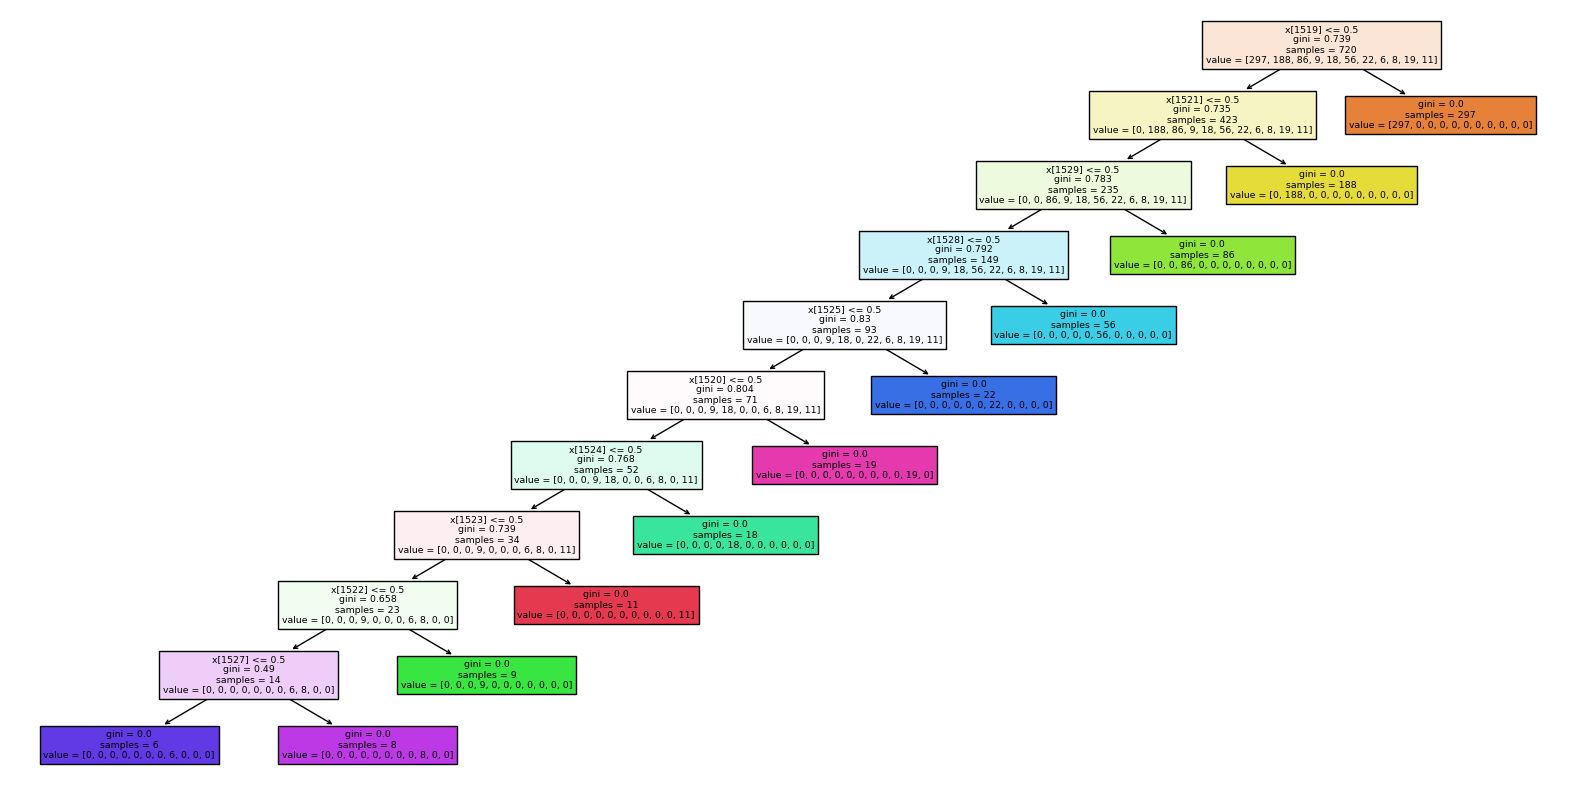

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

project_data=pd.read_excel('Dataset to B.tech.xlsx')

project_data = pd.get_dummies(project_data, columns=["Judgment", "Lawyers Summary", "Golden summary","Domain","Judgment Status","Equivalent Citation","Name","Court name"])
# Assuming 'target' is the name of your target variable
X = project_data.drop(columns=['Label'])
y = project_data['Label']

# Split the data into training and test sets (you can adjust the test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the test data
y_test_pred = clf.predict(X_test)

# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Create a figure and set the figure size for the Decision Tree plot
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(clf, filled=True)

# Show the Decision Tree plot
plt.show()


Training Accuracy: 0.93
Test Accuracy: 0.96


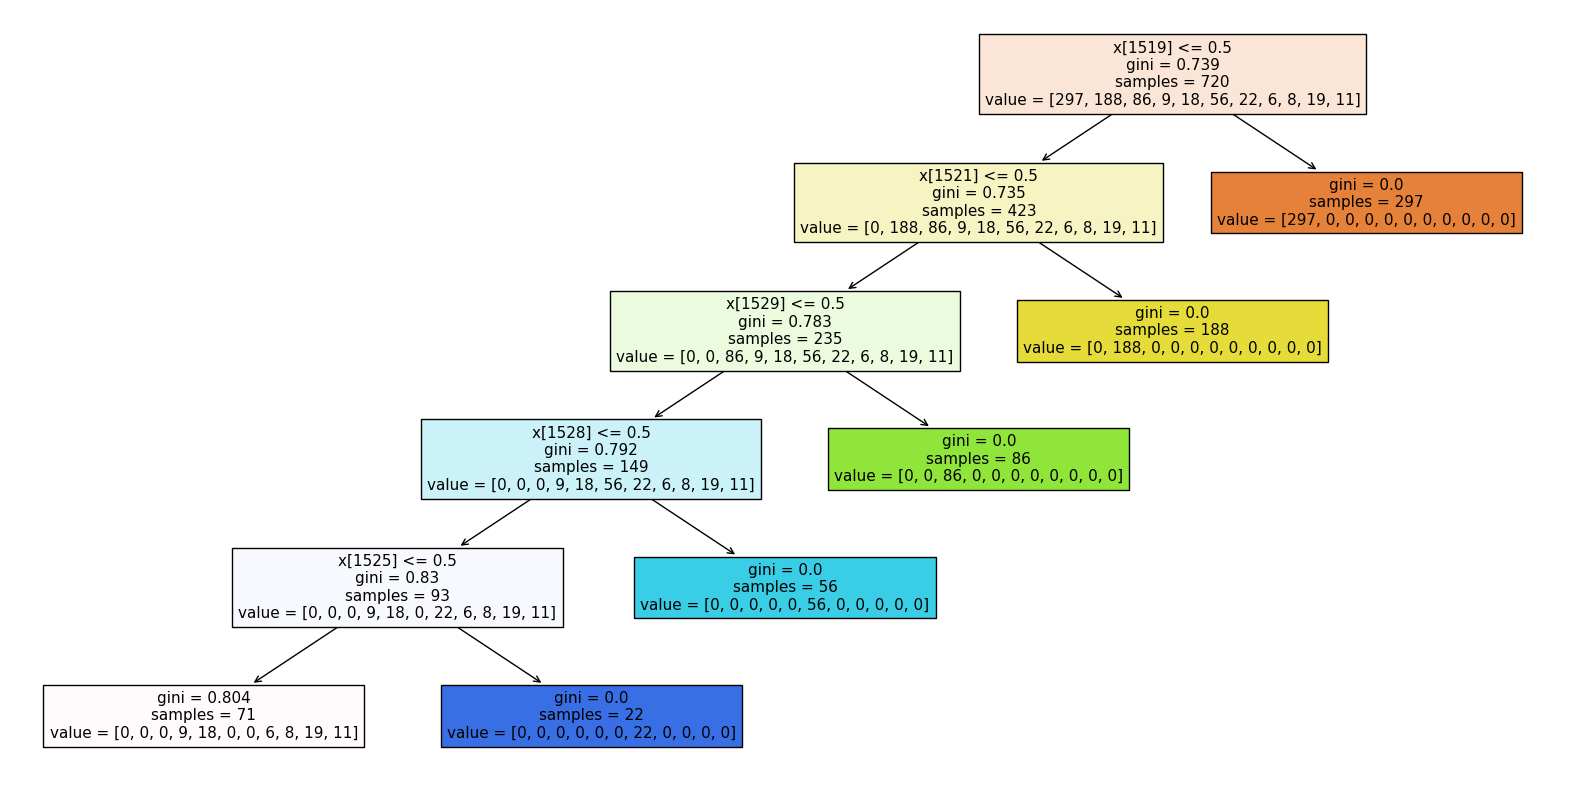

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

project_data=pd.read_excel('Dataset to B.tech.xlsx')

project_data = pd.get_dummies(project_data, columns=["Judgment", "Lawyers Summary", "Golden summary","Domain","Judgment Status","Equivalent Citation","Name","Court name"])
# Assuming 'target' is the name of your target variable
X = project_data.drop(columns=['Label'])
y = project_data['Label']

# Split the data into training and test sets (you can adjust the test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5)

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the test data
y_test_pred = clf.predict(X_test)

# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Create a figure and set the figure size for the Decision Tree plot
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(clf, filled=True)

# Show the Decision Tree plot
plt.show()

Training Accuracy: 1.00
Test Accuracy: 1.00


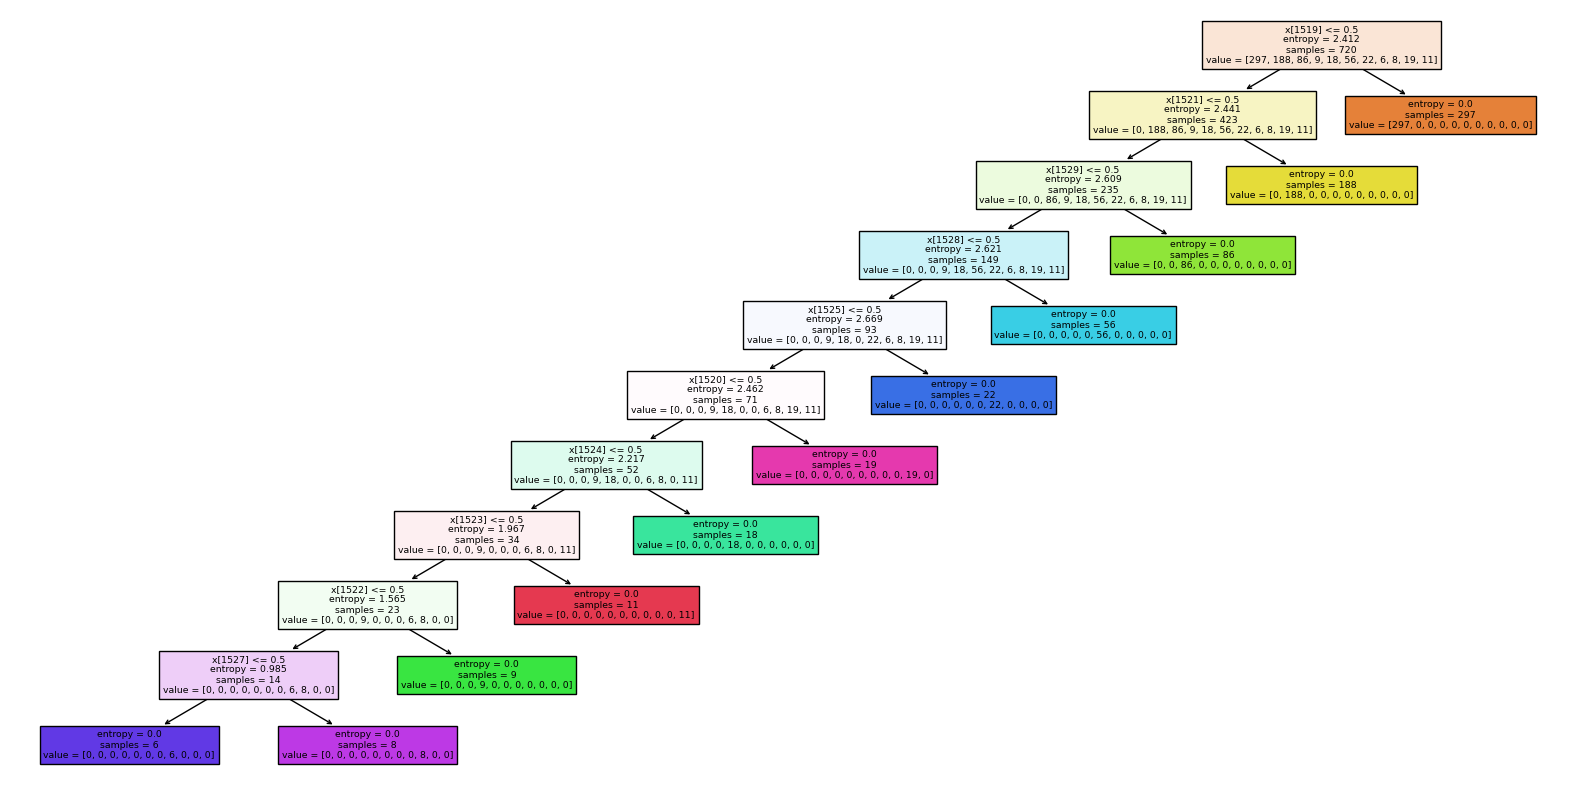

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

project_data=pd.read_excel('Dataset to B.tech.xlsx')

project_data = pd.get_dummies(project_data, columns=["Judgment", "Lawyers Summary", "Golden summary","Domain","Judgment Status","Equivalent Citation","Name","Court name"])
# Assuming 'target' is the name of your target variable
X = project_data.drop(columns=['Label'])
y = project_data['Label']

# Split the data into training and test sets (you can adjust the test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy")

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the test data
y_test_pred = clf.predict(X_test)

# Calculate the accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Create a figure and set the figure size for the Decision Tree plot
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(clf, filled=True)

# Show the Decision Tree plot
plt.show()